# Introduction to Earth System Data

# XYZ data

## Load data

In [2]:
# load from csv via pandas, please look up (=google) "pandas" and "numpy"
import pandas as pd
import numpy as np

# data file in Extra/data_examples.zip
df = pd.read_csv('../data_samples/xyz/points3d.csv')
# df

## Plot data

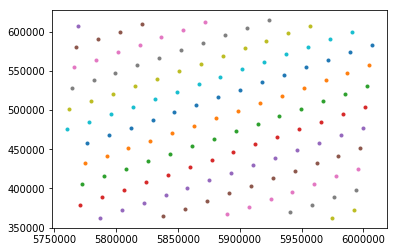

In [4]:
# plot the xy point location
from matplotlib import pyplot as plt


# df.plot(x='eastings', y='northings', marker='.')

x,y = [],[]

x.append (df.eastings)
y.append (df.northings)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y,x,'.')
plt.show()
# What are the map units (degrees or m ?), possible projection (UTM or latlong ? )

### Color-code by "z" plots

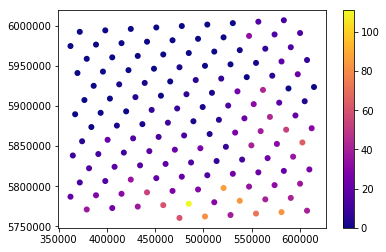

In [5]:
# color code by Z
from matplotlib import pyplot as plt
from matplotlib import colorbar 
x,y,z = [],[],[]

x.append (df.eastings)
y.append (df.northings)
z.append (df.topo)
# color = [str(item/255.) for item in z]
fig = plt.figure()
ax = fig.add_subplot(111)
# colors = plt.cm.coolwarm(z)
cax=ax.scatter(x, y, marker='.', linewidths=3, c=z, cmap=plt.cm.plasma)
plt.colorbar(cax, ax=ax)
plt.show()

# from matplotlib import pyplot as plt

# x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
# y = [125, 32, 54, 253, 67, 87, 233, 56, 67]

# color = [str(item/255.) for item in y]

# plt.scatter(x, y, s=500, c=color)

# plt.show()

# Time series

see (and quickly go through) also http://earthpy.org/pandas-basics.html

## Load from Excel into pandas

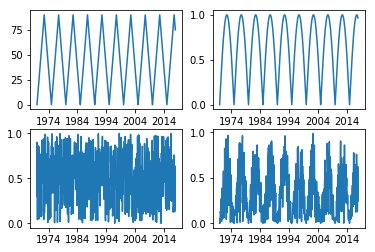

In [6]:
# this can be used for any data load and eventual plot, from composition, to spectral, time series (present example)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path = '../data_samples/excel/'
filename = 'sample-time-series.xlsx'

import pandas as pd
xl= pd.ExcelFile(path + filename)
xl.sheet_names

df = xl.parse("sample-sheet-2")
df.head()

# Plotting all columns
# df.plot('Date', 'D')
# df.plot('Date', 'E')
# df.plot('Date', 'F', label='test')


f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(df.Date, df.B)
# axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].plot(df.Date, df.D)
# axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(df.Date, df.E)
# axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].plot(df.Date, df.F)
plt.show()
# Change some of the parameters above to understand how this works ... 

## Subsetting time series

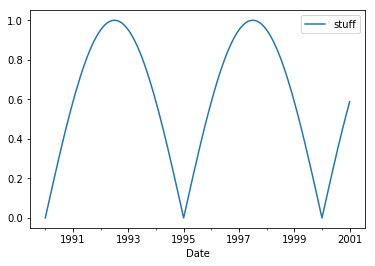

In [7]:
# for timeseries pandas you need to set a datetime index before resampling 
# please have a look at the extensive Time Series functionality of pandas at https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

df=df.set_index(pd.DatetimeIndex(df['Date']))
    
k1 = df.loc[(df.Date >= '1990-01-01') & (df.Date < '2001-01-07')]

k1.plot('Date', 'D', label='stuff')
plt.show()

In [ ]:
# plot the xy point location
from matplotlib import pyplot as plt


# df.plot(x='eastings', y='northings', marker='.')

x,y = [],[]

x.append (df.eastings)
y.append (df.northings)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y,x,'.')
plt.show()
# What are the map units (degrees or m ?), possible projection (UTM or latlong ? )### Resampling time series

In [12]:
resampled = df.resample('3M')

# Very Useful for a variety of different fields / topics from financial stock markets to climate series !

# resampled = df.resample('3M', format='%m/%d/%Y %H:%M:%S' )

# B       business day frequency
# C       custom business day frequency (experimental)
# D       calendar day frequency
# W       weekly frequency
# M       month end frequency
# SM      semi-month end frequency (15th and end of month)
# BM      business month end frequency
# CBM     custom business month end frequency
# MS      month start frequency
# SMS     semi-month start frequency (1st and 15th)
# BMS     business month start frequency
# CBMS    custom business month start frequency
# Q       quarter end frequency
# BQ      business quarter endfrequency
# QS      quarter start frequency
# BQS     business quarter start frequency
# A       year end frequency
# BA      business year end frequency
# AS      year start frequency
# BAS     business year start frequency
# BH      business hour frequency
# H       hourly frequency
# T       minutely frequency
# S       secondly frequency
# L       milliseonds
# U       microseconds
# N       nanoseconds

# resampled.plot()
# resampled.var()[:5]

# Tasks 

## T4.1 (time series subset)

* Please change the range of subset and produce a figure, to be included and commented in report (see task description below)

In [13]:
# alternatively use this query subset to produce a figure (see examples above)

df.query('Date > "2017-07-1"')

subset1 = df.query('Date > "2017-07-1"')

subset1

,Date,B,C,D,E,F
Date,,,,,,
2017-08-01,2017-08-01,87,1.518436,0.998630,0.569347,0.568567
2017-09-01,2017-09-01,84,1.466077,0.994522,0.128167,0.127465
2017-10-01,2017-10-01,81,1.413717,0.987688,0.146296,0.144495
2017-11-01,2017-11-01,78,1.361357,0.978148,0.637841,0.623903
2017-12-01,2017-12-01,75,1.308997,0.965926,0.254136,0.245476


# Loading real data: Example time series (e.g. from netCDF)

# Tasks

## Task 4.2 - Time series in excel format

1. Follow the example provided below
2. Examine the excel file, experiment with changing some of the parameters and plotting
3. Compare by using excel or libreoffice (free excel) to plot and get similar results


e.g something downloaded from the NOAA archives, in this case FTP (see links below):

```
ftp://ftp.ncdc.noaa.gov/pub/data/paleo/historical/europe/

ftp://ftp.ncdc.noaa.gov/pub/data/paleo/historical/europe/dobrovolny2010temperature.xls
```

from:

Dobrovolný, P., A. Moberg, R. Brázdil, C. Pfister, R. Glaser, R. Wilson, A. van Engelen, D. Limanówka, A. Kiss, M. Halíčková, J. Macková, D. Riemann, J. Luterbacher, and R. Böhm.  2010. Monthly, seasonal and annual temperature reconstructions for Central Europe derived from documentary evidence and instrumental records since AD 1500. Climatic Change, 101, 1-2, 69-107.  DOI [10.1007/s10584-009-9724-x](https://doi.org/10.1007/s10584-009-9724-x)

Readme info for the dataset:

```
Central European 500 Year Temperature Reconstructions
-----------------------------------------------------------------------
               World Data Center for Paleoclimatology, Boulder
                                  and
                     NOAA Paleoclimatology Program
-----------------------------------------------------------------------
NOTE: PLEASE CITE ORIGINAL REFERENCE WHEN USING THIS DATA!!!!!


NAME OF DATA SET: Central European 500 Year Temperature Reconstructions  
LAST UPDATE: 7/2010 (Original Receipt by WDC Paleo) 
CONTRIBUTORS: Dobrovolný, P., A. Moberg, R. Brázdil, C. Pfister, 
R. Glaser,  R. Wilson, A. van Engelen, D. Limanówka, A. Kiss, 
M. Halícková, J. Macková, D. Riemann, J. Luterbacher, and R. Böhm.
 
IGBP PAGES/WDCA CONTRIBUTION SERIES NUMBER: 2010-061 

WDC PALEO CONTRIBUTION SERIES CITATION: 
Dobrovolný, P., et al. 2010. 
IGBP PAGES/World Data Center for Paleoclimatology 
Data Contribution Series  # 2010-061. 
NOAA/NCDC Paleoclimatology Program, Boulder CO, USA. 


ORIGINAL REFERENCE: 
Dobrovolný, P., A. Moberg, R. Brázdil, C. Pfister, R. Glaser,  
R. Wilson, A. van Engelen, D. Limanówka, A. Kiss, M. Halícková, 
J. Macková, D. Riemann, J. Luterbacher, and R. Böhm.  2010. 
Monthly, seasonal and annual temperature reconstructions 
for Central Europe derived from documentary evidence 
and instrumental records since AD 1500. 
Climatic Change, 101, 1-2, 69-107.  DOI 10.1007/s10584-009-9724-x

ABSTRACT: 
Monthly temperature series for Central Europe back to AD 1500 
are developed from documentary index series from Germany, 
Switzerland and the Czech Republic (1500–1854) and 11 instrumental 
temperature records (1760–2007).  Documentary evidence from the 
Low Countries, the Carpathian Basin and Poland are used for 
cross-checking for earlier centuries. The instrumental station 
records are corrected for inhomogeneities, including insufficient 
radiation protection of early thermometers and the urban heat island 
effect. For overlapping period (1760-1854), the documentary data 
series correlate with instrumental temperatures, most strongly 
in winter (86% explained variance in January) and least in autumn 
(56% in September). For annual average temperatures, 81% of the 
variance is explained. Verification statistics indicate high 
reconstruction skill for most months and seasons.  The last 20 years 
(since 1988) stand out as very likely the warmest 20-year period,
accounting for the calibration uncertainty and decreases in proxy 
data quality before the calibration period. The new reconstruction 
displays a previously unobserved long-term decrease in DJF, MAM 
and JJA temperature variability over last five centuries. Compiled 
monthly, seasonal and annual series can be used to improve the 
robustness of gridded large-scale European temperature 
reconstructions and possible impact studies. Further improvement 
of the reconstruction would be achieved if documentary data from 
other European countries are further developed. 


GEOGRAPHIC REGION: Central Europe 
PERIOD OF RECORD: 1500 - 2007 AD 

FUNDING SOURCES: 
EU-project MILLENNIUM (contract no 017008-2), Anders Moberg 
was funded by the Swedish Research Council, VR. Jürg Luterbacher 
acknowledges support of the EU/FP6 project CIRCE (grant 036961) 
and from the EU/FP7 project ACQWA (grant 212250). 



DESCRIPTION: 
Monthly, seasonal and annual temperatures for Central Europe 
reconstructed from descriptive qualitative documentary sources. 
Documentary sources used in the form of indices. Monthly indices 
used at 7-degree scale (-3 means extremely cold conditions, 
-2 very cold, -1 cold, 0 normal, +1 warm, +2 very warm, 
+3 extremely warm). Seasonal and annual indices were calculated 
as a sum of corresponding monthly values. Index series from Germany, 
Switzerland and the Czech Lands were used for final reconstruction. 
Temperatures are expressed as anomalies from the 1961–1990 average.
Documentary indices are unitless.
 
Central Europe: 45°-53°N, 6°-20°E. 



DATA: 
17 reconstructions: 12 months, 4 seasons (DJF, MAM, JJA, SON) 
and annual values. Each reconstruction is provided in the 
following structure:

Column 1: Year AD
Column 2: SPLICED - final reconstruction: CEU.scal (1500-1759) & CEU.instr (1760-2007)
Column 3: INSTR -  instrumental temperatures (1760-2007)
Column 4: REG - reconstruction calibrated by regression (1500-1854)
Column 5: SE - standard error from calibration, adjusted upwards in periods of weak common signal
Column 6: REG + 2SE
Column 7: REG - 2SE
Column 8: SCALED - reconstruction with variance and mean adjusted
Column 9: DE.ind - temperature index for Germany
Column 10: CH.ind - temperature index for Switzerland
Column 11: CZ.ind - temperature index for the Czech Lands

```


# Plotting

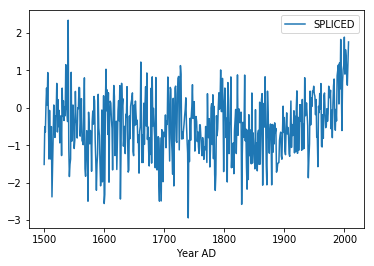

In [14]:
# this can be used for any data load and eventual plot, from composition, to spectral, time series (present example)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path = '../data_samples/excel/'
filename = 'dobrovolny2010temperature.xls'

import pandas as pd
xl= pd.ExcelFile(path + filename)
xl.sheet_names

Jan = xl.parse("Jan")
Feb = xl.parse("Feb")
Mar = xl.parse("Mar")
Apr = xl.parse("Apr")
May = xl.parse("May")
Jun = xl.parse("Jun")
Jul = xl.parse("Jul")
Aug = xl.parse("Aug")
Sep = xl.parse("Sep")
Oct = xl.parse("Oct")
Nov = xl.parse("Nov")
Dec = xl.parse("Dec")
Annual =  xl.parse("ANN")
df.head()

# Plotting all columns
Annual.plot('Year AD', 'SPLICED')

# trick to make matplotlib happy to call the column.
Annual.columns = [c.replace(' ', '_') for c in Annual.columns]

# df.plot('Date', 'E')
# df.plot('Date', 'F', label='test')



# Moving Average / smoothing

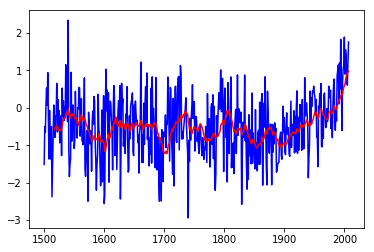

In [15]:
# smoothing can have boundary effects, e.g. see 
# http://www.meteo.psu.edu/holocene/public_html/shared/articles/MannGRL08.pdf

import numpy as np
import matplotlib.pyplot as plt

# quick and dirty
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

smooth_annual = smooth(Annual.SPLICED, 14)


len(smooth_annual)
# len(Annual.SPLICED)

rolling_average_annual = Annual.rolling(window=18).mean()

# Anual.plot('Year_AD', 'SPLICED')
# rolling_average_annual.plot('Year_AD', 'SPLICED')





fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Annual.Year_AD, Annual.SPLICED, color="blue")
ax.plot(Annual.Year_AD, rolling_average_annual.SPLICED, color="red")
plt.show()

## Time series from online-accessible netCDF

netCDF, HDF or other complex formats are capable of containing a wide range of data, from raster, to time series.

E.g. from the raster point of view, commercial mapping tools such as ESRI ArcGis (or open source counterparts, such as QGIS) have specific workflows to deal with [netCDF](http://help.arcgis.com/en/arcgisdesktop/10.0/pdf/netcdf-tutorial.pdf) or [HDF](http://www.hdfeos.org/software/arcgis.php), with additional examples:

* https://nsidc.org/support/how/how-import-smap-hdf-data-arcgis
* https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/multidimensional-raster-types.htm
* https://desktop.arcgis.com/en/arcmap/10.3/manage-data/netcdf/about-the-netcdf-tutorial.htm

Note - this cannot be done in excel !

In [16]:
# e.g. see http://nbviewer.jupyter.org/gist/rsignell-usgs/d55b37c6253f27c53ef0731b610b81b4
%matplotlib inline

In [17]:
import numpy as np
import xarray as xr

In [18]:
import datetime as dt
from datetime import datetime, timedelta # 

dayFile = datetime.now() - timedelta(days=1)
dayFile  = dayFile.strftime("%Y%m%d")

url='http://nomads.ncep.noaa.gov:9090/dods/nam/nam%s/nam1hr_00z' %(dayFile)
print(url)

http://nomads.ncep.noaa.gov:9090/dods/nam/nam20181024/nam1hr_00z


In [19]:
ds = xr.open_dataset(url)

# Specify desired station time series location
# note we add 360 because of the lon convention in this dataset
#lati = 36.605; loni = -121.85899   # west of Pacific Grove, CA
lati = 41.4; loni = -100.8  # Georges Bank

In [20]:
# extract a dataset closeste to specified point
dsloc = ds.sel(lon=loni, lat=lati, method='nearest')

/Users/anrossi/miniconda/envs/python3test/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


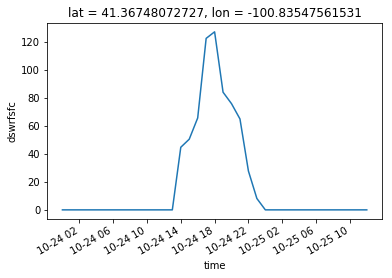

In [21]:
# select a variable to plot
dsloc['dswrfsfc'].plot()
plt.show()

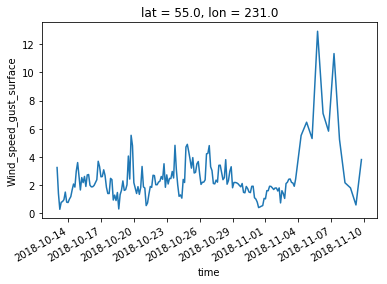

In [23]:
import xarray as xr

# see http://nbviewer.jupyter.org/gist/rsignell-usgs/e032db75e748cf5922d38d8be9e0ecef

fname = 'http://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/Global_onedeg/Best'  # Remote OPeNDAP Dataset 
#fname = 'my_raster_time_series_data.nc'   # Local NetCDF file, if website not working

ds = xr.open_dataset(fname)
dsloc = ds.sel(lon=230.5,lat=55.0,method='nearest')

dsloc['Wind_speed_gust_surface'].plot()
plt.show()

## Load HDF 


You can also *try* (preferably on your computers, due to java compatibility issues on CLAMV) to load HDF (and inspect the complex structure of the file) with tools such as [Panoply](https://www.giss.nasa.gov/tools/panoply/). It does open also netCDF and GRIB files.

# Tasks

## Task 4.3

1. Please open provided sample data files (the same used below in netcdf, hdf5) with Panoply and document with screenshots
2. Continue with the examples below. What is "Cartopy"?

# Load geospatial raster files + plot with Cartopy

### netCDF

In [24]:
# Using sample data from gerda@piggy;
#
# References:
#http://unidata.github.io/netcdf4-python/
#https://annefou.github.io/metos_python/02-formats/

In [28]:
from netCDF4 import Dataset

In [29]:
# netCDF:
nc_f='../data_samples/netCDF/gistemp250.nc'

In [30]:
nc_fid = Dataset(nc_f, 'r')
print (nc_fid)
#nc_fid.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: GISTEMP Surface Temperature Analysis
    institution: NASA Goddard Institute for Space Studies
    source: http://data.giss.nasa.gov/gistemp/
    Conventions: CF-1.6
    history: Created 2018-02-09 15:25:45 by SBBX_to_nc 2.0 - ILAND=250,  IOCEAN=none,     Base: 1951-1980
    dimensions(sizes): lat(90), lon(180), time(1657), nv(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), int32 time(time), int32 time_bnds(time,nv), int16 tempanomaly(time,lat,lon)
    groups: 



In [31]:
lats=nc_fid.variables['lat']
lons=nc_fid.variables['lon']
time=nc_fid.variables['time']
temp=nc_fid.variables['tempanomaly']

In [32]:
# using cartopy - http://scitools.org.uk/cartopy/docs/latest/index.html
# We will then plot temperature anomaly according to lat/lon coordinates
import cartopy
# We'll need matplotlib.pyplot to plot
import matplotlib.pyplot as plt
# And astropy.time to convert time from mjd
from astropy.time import Time

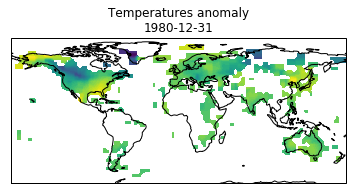

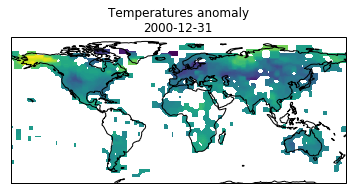

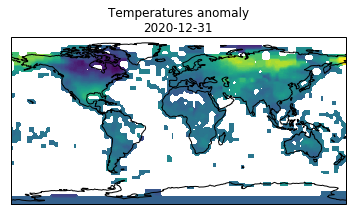

In [33]:
def plotTime(timeIndex):
    Date=Time(time[timeIndex],format='mjd', scale='utc') #convert time to date with astropy
    Date.format='iso' # output in iso format 
    Date.out_subfmt='date' # only show date
    ax = plt.axes(projection=cartopy.crs.PlateCarree()) #set axes projection
    plt.title('Temperatures anomaly\n' + str(Date))
    plt.contourf(lons[:],lats[:],temp[timeIndex,:,:], 60, transform=cartopy.crs.PlateCarree())
    ax.coastlines()
    plt.show()
    
plotTime(505)
plotTime(745)
plotTime(985)

### HDF5

In [34]:
# see https://sukhbinder.files.wordpress.com/2014/05/pytables_intro_how_to_read_hdf5_with_python.gif
# see https://confluence.slac.stanford.edu/display/PSDM/How+to+access+HDF5+data+from+Python

# alternatively one could use pandas
# import pandas as pd
# pd.read_hdf(filename,key)


In [35]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

/Users/anrossi/miniconda/envs/python3test/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [36]:
hdf5_file_name = '../data_samples/hdf/NEONDSTowerTemperatureData.hdf5'
file=h5py.File(hdf5_file_name, 'r')
file

<HDF5 file "NEONDSTowerTemperatureData.hdf5" (mode r)>

In [37]:
list(file.keys())

['Domain_03', 'Domain_10']

In [38]:
d03=file['Domain_03']
list(d03)

['OSBS']

In [39]:
OSBS=d03['OSBS']
list(d03['OSBS'])

['min_1', 'min_30']

In [40]:
list(d03['OSBS']['min_1'])

['boom_1', 'boom_2', 'boom_3', 'boom_5', 'tower_top']

In [41]:
list(d03['OSBS']['min_1']['tower_top'])

['temperature']

In [42]:
dset=d03['OSBS']['min_1']['tower_top']['temperature']

In [43]:
list(dset.attrs)

['date',
 'numPts',
 'mean',
 'min',
 'max',
 'variance',
 'stdErr',
 'uncertainty',
 'Product ID',
 'Product Name']

In [44]:
dset.attrs['Product Name']

b'1 minute mean temperature tower level 6'

In [45]:
meanTmpAtTowerTop=dset['date', 'mean']
print(meanTmpAtTowerTop[:5])

[(b'2014-04-01 00:00:00.0', 21.80952205)
 (b'2014-04-01 00:01:00.0', 21.69909421)
 (b'2014-04-01 00:02:00.0', 21.69083417)
 (b'2014-04-01 00:03:00.0', 21.68552605)
 (b'2014-04-01 00:04:00.0', 21.61199099)]


In [46]:
dates=[x[0] for x in meanTmpAtTowerTop]
temps=[y[1] for y in meanTmpAtTowerTop]
print(dates[:5])

[b'2014-04-01 00:00:00.0', b'2014-04-01 00:01:00.0', b'2014-04-01 00:02:00.0', b'2014-04-01 00:03:00.0', b'2014-04-01 00:04:00.0']


In [47]:
# values for dates are provided as byte arrays, but 
# we need strings to be able to convert to datetime objects for plotting
# so we convert byte array to a string using list comprehension:
datesStr=["".join([chr(y) for y in x[:-2]]) for x in dates]
print(datesStr[:5])

['2014-04-01 00:00:00', '2014-04-01 00:01:00', '2014-04-01 00:02:00', '2014-04-01 00:03:00', '2014-04-01 00:04:00']


In [48]:
from datetime import datetime
times = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in datesStr]
print(times[:5])

[datetime.datetime(2014, 4, 1, 0, 0), datetime.datetime(2014, 4, 1, 0, 1), datetime.datetime(2014, 4, 1, 0, 2), datetime.datetime(2014, 4, 1, 0, 3), datetime.datetime(2014, 4, 1, 0, 4)]


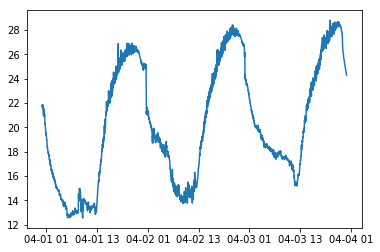

In [49]:
plt.plot(times, temps)
plt.show()

In [50]:
# now we can combine the last few steps into a 
# function and see how tepmerature differs across the tower:

In [51]:
def plotTmps(dset):
    meanTmpAtTowerTop=dset['date', 'mean']
    dates=[x[0] for x in meanTmpAtTowerTop]
    temps=[y[1] for y in meanTmpAtTowerTop]
    datesStr=["".join([chr(y) for y in x[:-2]]) for x in dates]
    times = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in datesStr]
    plt.plot(times, temps)

In [52]:
listOfDSetNames=list(d03['OSBS']['min_1'])
listOfDSetNames

['boom_1', 'boom_2', 'boom_3', 'boom_5', 'tower_top']

In [53]:
gdset=lambda dname: d03['OSBS']['min_1'][dname]['temperature']# make a lamba function to return dataset
listOfDSets=list(map(gdset, listOfDSetNames))# map lambda function to a list

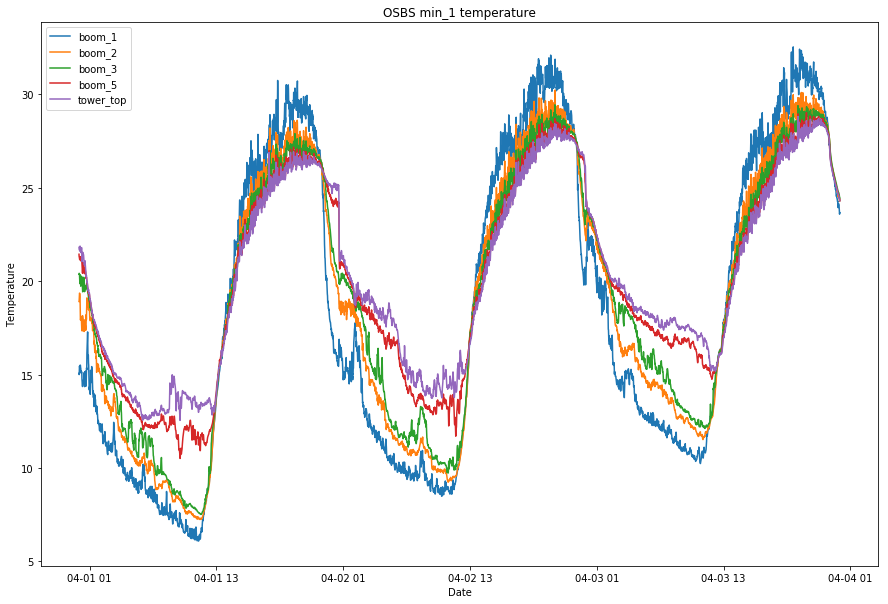

In [54]:
plt.figure(figsize=(15,10)) # Lets make this a bigger figure
for dSet in listOfDSets: plotTmps(dSet)
plt.title('OSBS min_1 temperature')
plt.xlabel('Date')# labels
plt.ylabel('Temperature')
plt.legend(listOfDSetNames, loc='best')
plt.show()

In [55]:
#If the file contains an error, h5py may be unable to open a dataset
hdf5_other_file_name = '../data_samples/hdf/MOD09A1.A2000057.h00v08.005.2006270072347.hdf'
other_file=h5py.File(hdf5_other_file_name, 'r') # This should throw an error

OSError: Unable to open file (file signature not found)

In [56]:
# however, you may still be able to open it with NetCDF:
from netCDF4 import Dataset
hdfDatasetFile='../data_samples/hdf/MOD09A1.A2000057.h00v08.005.2006270072347.hdf'
hdfDataset = Dataset(hdfDatasetFile, 'r')
print(str(hdfDataset)[:500])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF4):
    HDFEOSVersion: HDFEOS_V2.9
    StructMetadata.0: GROUP=SwathStructure
END_GROUP=SwathStructure
GROUP=GridStructure
	GROUP=GRID_1
		GridName="MOD_Grid_500m_Surface_Reflectance"
		XDim=2400
		YDim=2400
		UpperLeftPointMtrs=(-20015109.354000,1111950.519667)
		LowerRightMtrs=(-18903158.834333,-0.000000)
		Projection=GCTP_SNSOID
		ProjParams=(6371007.181000,0,0,0,0,0,0,0,0,0,0,0,0)
		SphereCode=-1
		GROUP=Dimens


# Image load - like thin section

# Tasks

## Task 4.4

1. Continue with the examples below on image anlysis and directional data. Experiment with the paramters.
2. What kind of image data is used below ? What is it showing ? 
3. What kind of directional data is used in geosciences ? What do these diagrams show / represent ?

Sources of think section images, e..g

* Sedimentary rocks
    * Carbonate rock think sections - [from SEPM](http://www.sepmstrata.org/page.aspx?&pageid=298&6)
    * Clastic rock thin sections - [from SEPM](http://sepmstrata.org/page.aspx?pageid=110)
* Igneous & sedimentary rocks
    * [Atlas of igneous and sedimentary rocks in think section](http://leggeo.unc.edu/Petunia/IgMetAtlas/mainmenu.html)

In [57]:
# load image from url, 
# searching examples, e.g. from Ooids on http://www.sepmstrata.org/page.aspx?pageid=105
# images loaded from http://www.sepmstrata.org/microscopic_Gallery_list.aspx?gcid=11

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.sepmstrata.org/Images/_Gallery_Micro/Photos_Related/o-07-5x-01.jpg", width=300)

In [58]:
# use scikit image (skimage) or pillow..?

one can also use ImageJ (software for Image Analysis) 
    


## Directional data, e.g. Stereonets

e.g. see http://geologyandpython.com/structural_geology.html



In [59]:
import numpy as np
import mplstereonet
import matplotlib.pyplot as plt

%matplotlib inline

In [60]:
strike1, dip1 = 10, 30
strike2, dip2 = 315, 78

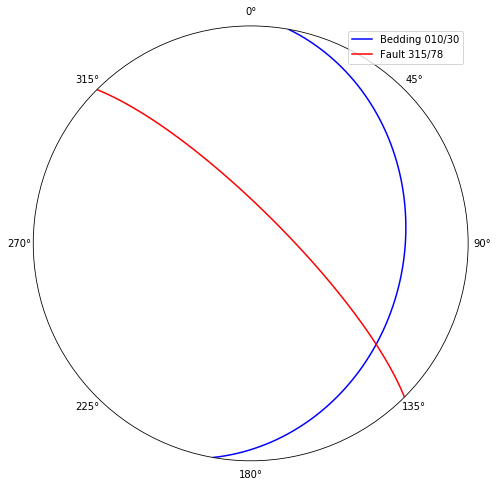

In [61]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(strike1, dip1, c='b', label='Bedding %03d/%02d' % (strike1, dip1))
ax.plane(strike2, dip2, c='r', label='Fault %03d/%02d' % (strike2, dip2))
ax.legend()

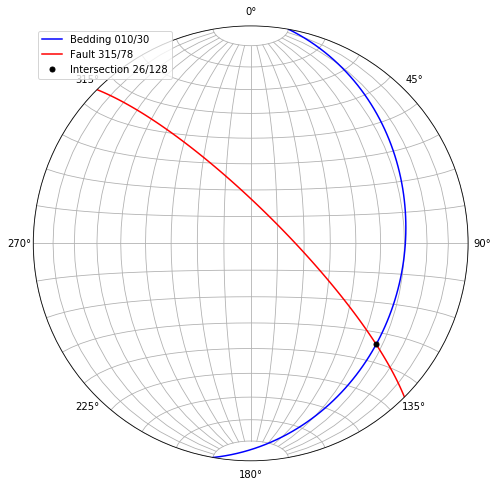

In [62]:
plunge, bearing = mplstereonet.plane_intersection(strike1, dip1, strike2, dip2)
ax.line(plunge, bearing, 'ko', markersize=5, 
        label='Intersection %02d/%03d' % (plunge, bearing))
ax.legend()
# We can also add a grid
ax.grid()
fig